In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [5]:
from pandas_profiling import ProfileReport
import pickle

ModuleNotFoundError: No module named 'pandas_profiling'

In [7]:
df= pd.read_csv("H:\dataset_csv\diabetes.csv")

In [8]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [10]:
ProfileReport(df)

NameError: name 'ProfileReport' is not defined

Observation:

     1) No Of Zeroes in the dataset:
         1) There is 14.5% zeroes in the Pregrancies Columns.
         2) There is 0.7 % zeroes in the Glucose Columns.
         3) There is 1.4% zeroes in the BMI Columns.
         4) There is 4.6% zeroes in the BloodPressure Columns.
         5) There is 29.6% zeroes in the SkinThickness Columns.
         
     2) There is no Nan Value Present in the Dataset.
     3) There is no Multi-Colinerity Feature are there.
     4) There is Skewness in the dataset it means there is outlier.

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df["BMI"]=df['BMI'].replace(0,df["BMI"].mean())

In [13]:
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())

In [14]:
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())

In [15]:
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())

In [16]:
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())

In [17]:
df["Pregnancies"]=df["Pregnancies"].replace(0,df["Pregnancies"].mean())

In [18]:
ProfileReport(df)

NameError: name 'ProfileReport' is not defined

<AxesSubplot:>

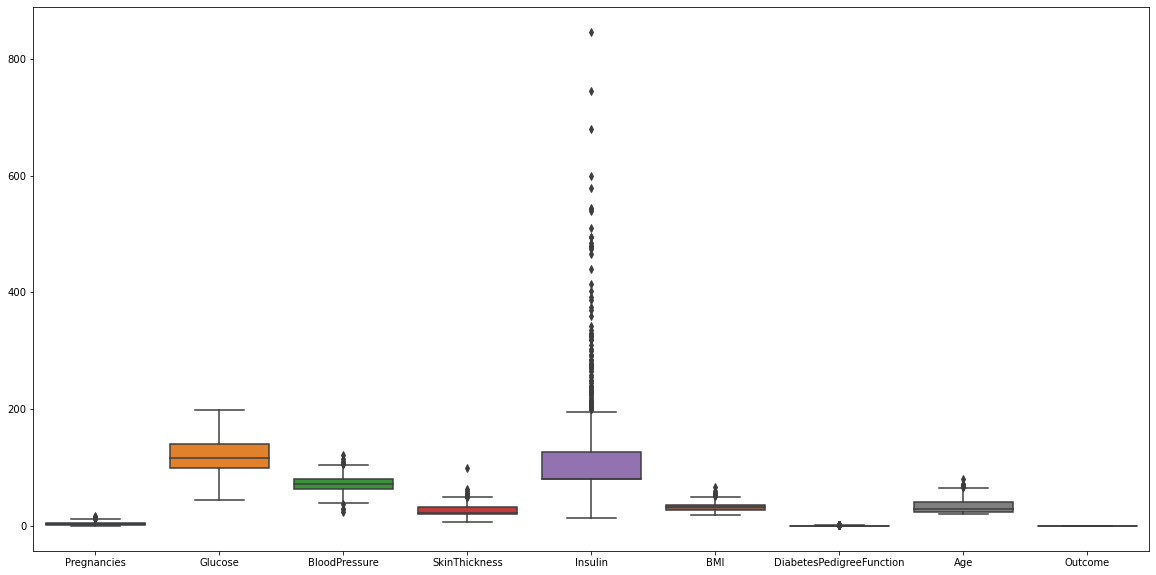

In [19]:
fig=plt.subplots(figsize=(20,10))
sns.boxplot(data=df)

In [20]:
q=df["Insulin"].quantile(.85)
df_new=df[df["Insulin"]<q]

In [21]:
df_new.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0


<AxesSubplot:>

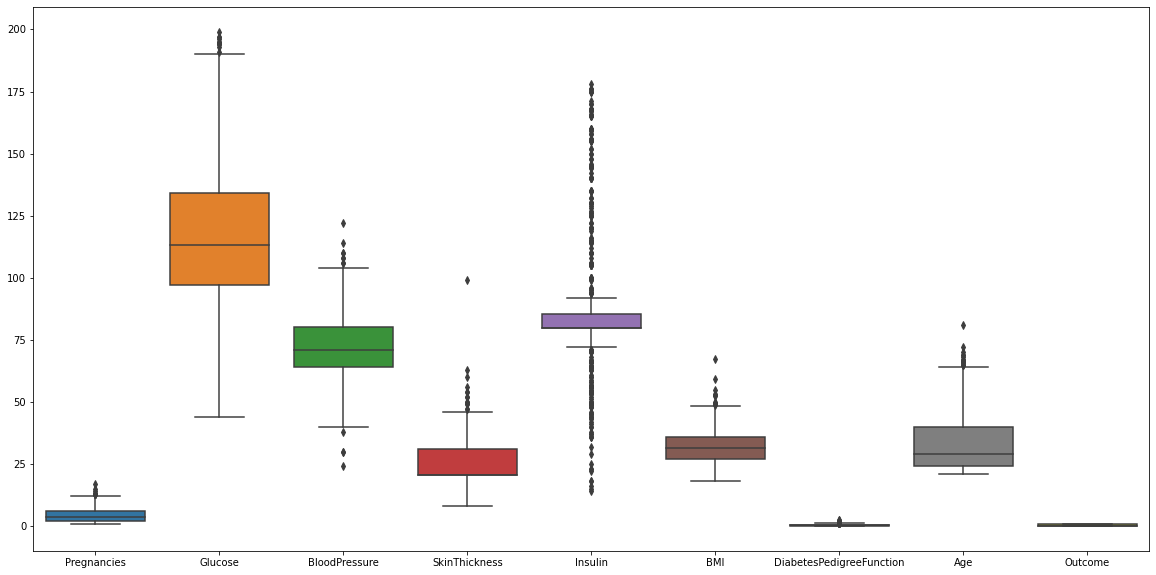

In [22]:
fig=plt.subplots(figsize=(20,10))
sns.boxplot(data=df_new)

In [23]:
q=df_new["Pregnancies"].quantile(.98)
df_new=df_new[df_new["Pregnancies"] < q]

q=df_new["BMI"].quantile(.99)
df_new=df_new[df_new["BMI"]<q]

q=df_new["SkinThickness"].quantile(.98)
df_new=df_new[df_new["SkinThickness"] < q]

q=df_new["Insulin"].quantile(.85)
df_new=df_new[df_new["Insulin"]<q]

q=df_new["DiabetesPedigreeFunction"].quantile(.99)
df_new=df_new[df_new["DiabetesPedigreeFunction"]<q]

q=df_new["Age"].quantile(.99)
df_new=df_new[df_new["Age"]<q]

<AxesSubplot:>

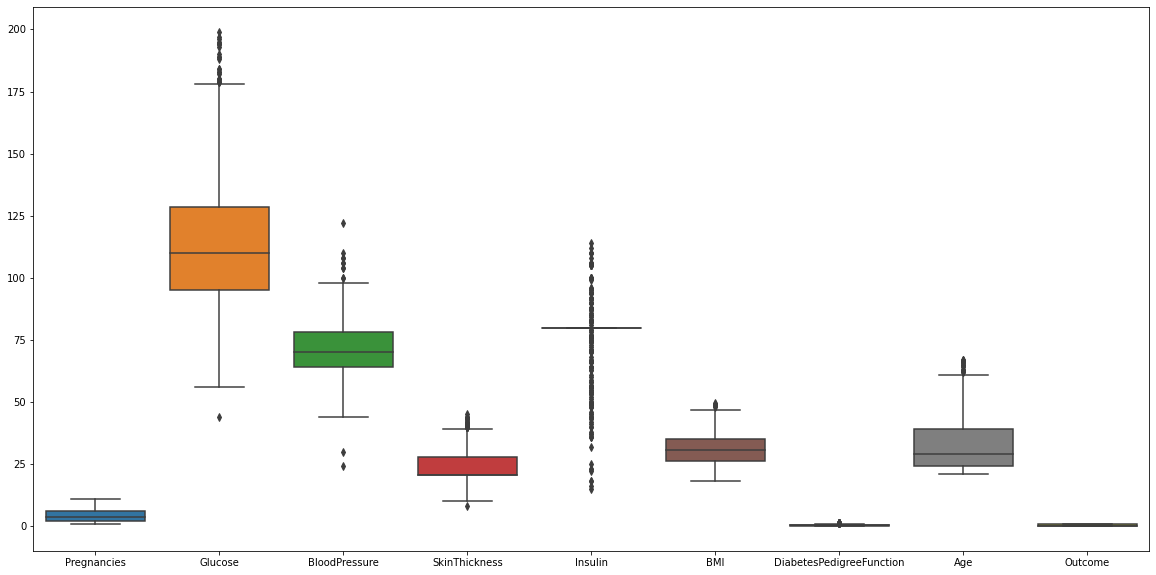

In [24]:
fig=plt.subplots(figsize=(20,10))
sns.boxplot(data=df_new)

In [25]:
df.shape

(768, 9)

In [26]:
df_new.shape

(503, 9)

In [27]:
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
ProfileReport(df_new)

NameError: name 'ProfileReport' is not defined

In [29]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [30]:
y=df_new.iloc[:,-1]
x=df_new.iloc[:,:-1]

In [31]:
# This dataset is skweness and varing a lot so we will use StandarScaler

In [32]:
scaler=StandardScaler()
scaler.fit_transform(x)
x_scaled=scaler.fit_transform(x)


In [33]:
x_scaled

array([[ 0.70025902,  1.17490758, -0.00459712, ...,  0.39066983,
         0.78757553,  1.53493025],
       [-1.22692647, -1.0249557 , -0.51141404, ..., -0.71439537,
        -0.24654474, -0.1360264 ],
       [ 1.47113322,  2.39705385, -0.68035302, ..., -1.23535468,
         0.9561821 , -0.04808131],
       ...,
       [ 0.31482192,  0.23210903, -0.00459712, ..., -0.77754196,
        -0.64370687, -0.22397148],
       [-1.22692647,  0.40670135, -1.01823097, ..., -0.16186277,
        -0.25403836,  1.27109499],
       [-1.22692647, -0.74560799, -0.1735361 , ..., -0.11450283,
        -0.38142999, -0.83958709]])

In [34]:
ProfileReport(pd.DataFrame(scaler.fit_transform(df_new)))

NameError: name 'ProfileReport' is not defined

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
df_new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
df_new=df_new(columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

TypeError: 'DataFrame' object is not callable

In [38]:
df1=df1(columns='Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome')

SyntaxError: positional argument follows keyword argument (3838904687.py, line 2)

In [39]:
df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.186214,0.264118,0.077036,0.149852,0.138138,0.007035,0.502427,0.245552
Glucose,0.186214,1.000000,0.263978,-0.004843,0.239774,0.193122,0.025800,0.310832,0.483448
BloodPressure,0.264118,0.263978,1.000000,0.120527,0.084933,0.251110,0.045213,0.378035,0.167416
SkinThickness,0.077036,-0.004843,0.120527,1.000000,0.080797,0.472475,0.062918,0.027502,0.074349
Insulin,0.149852,0.239774,0.084933,0.080797,1.000000,0.102541,-0.004350,0.134481,0.137249
BMI,0.138138,0.193122,0.251110,0.472475,0.102541,1.000000,0.121895,0.104603,0.310988
DiabetesPedigreeFunction,0.007035,0.025800,0.045213,0.062918,-0.004350,0.121895,1.000000,0.032329,0.191070
Age,0.502427,0.310832,0.378035,0.027502,0.134481,0.104603,0.032329,1.000000,0.232107
Outcome,0.245552,0.483448,0.167416,0.074349,0.137249,0.310988,0.191070,0.232107,1.000000


In [40]:
import klib

<AxesSubplot:xlabel='Age', ylabel='Density'>

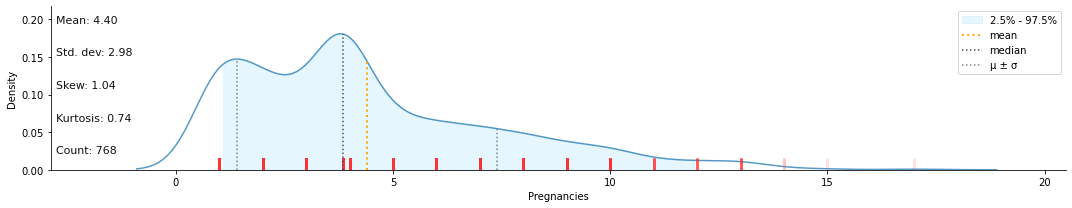

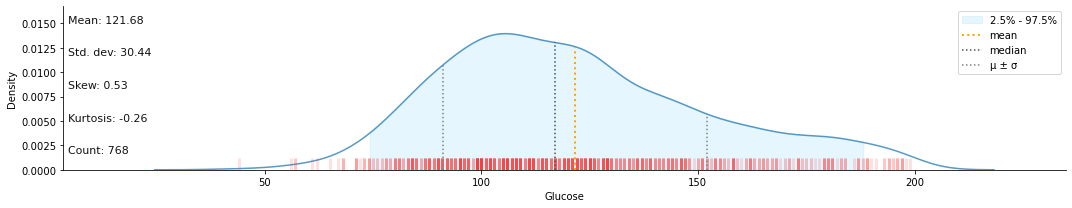

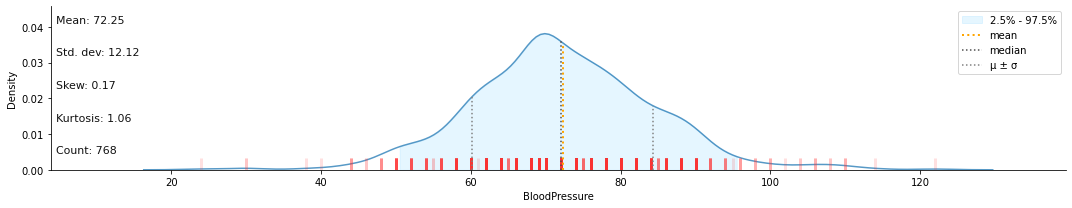

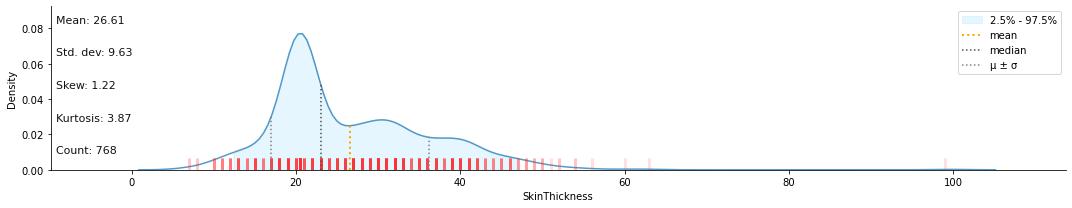

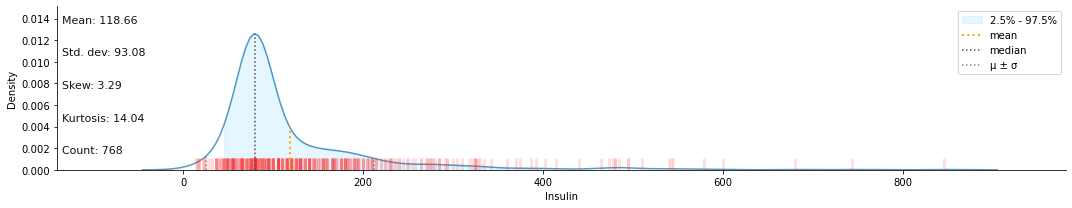

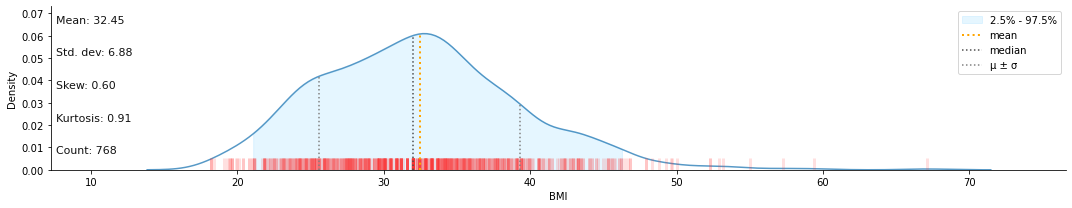

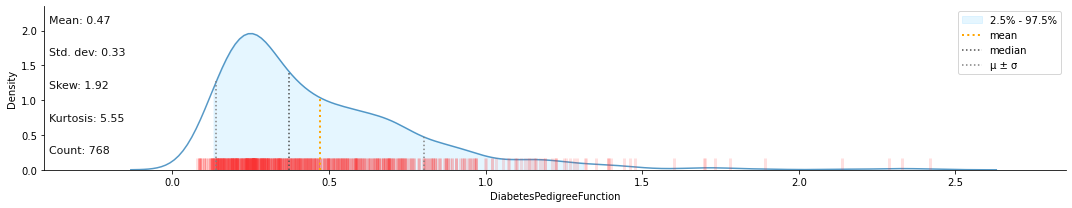

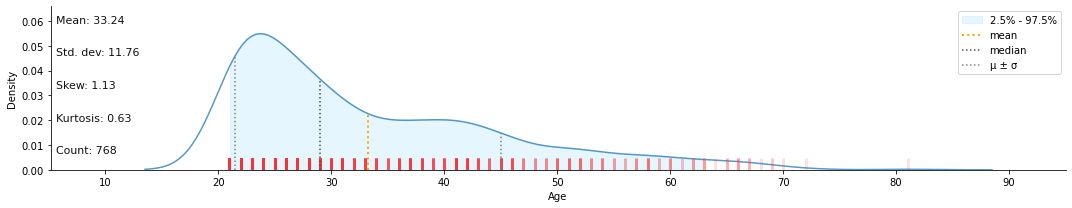

In [41]:
klib.dist_plot(df)

In [42]:
df1=pd.DataFrame(scaler.fit_transform(df_new))
df1

,0,1,2,3,4,5,6,7,8
0,0.700259,1.174908,-0.004597,1.486966,0.188179,0.390670,0.787576,1.534930,1.586658
1,-1.226926,-1.024956,-0.511414,0.673797,0.188179,-0.714395,-0.246545,-0.136026,-0.630256
2,1.471133,2.397054,-0.680353,-0.473251,0.188179,-1.235355,0.956182,-0.048081,1.586658
3,-1.226926,-0.885282,-0.511414,-0.139372,1.196139,-0.477596,-0.935958,-1.015477,-0.630256
4,0.314822,0.057517,0.164342,-0.473251,0.188179,-0.872262,-0.808567,-0.223971,-0.630256
...,...,...,...,...,...,...,...,...,...
498,1.856570,-0.885282,-0.849292,-0.473251,0.188179,-1.361648,-1.029629,0.039864,-0.630256
499,-0.841489,0.267027,-0.173536,0.402741,0.188179,0.895842,-0.287760,-0.487807,-0.630256
500,0.314822,0.232109,-0.004597,-0.139372,2.473788,-0.777542,-0.643707,-0.223971,-0.630256
501,-1.226926,0.406701,-1.018231,-0.473251,0.188179,-0.161863,-0.254038,1.271095,1.586658


In [43]:
df_new_scalar=pd.DataFrame(scaler.fit_transform(df_new))

In [44]:
df_new_scalar

,0,1,2,3,4,5,6,7,8
0,0.700259,1.174908,-0.004597,1.486966,0.188179,0.390670,0.787576,1.534930,1.586658
1,-1.226926,-1.024956,-0.511414,0.673797,0.188179,-0.714395,-0.246545,-0.136026,-0.630256
2,1.471133,2.397054,-0.680353,-0.473251,0.188179,-1.235355,0.956182,-0.048081,1.586658
3,-1.226926,-0.885282,-0.511414,-0.139372,1.196139,-0.477596,-0.935958,-1.015477,-0.630256
4,0.314822,0.057517,0.164342,-0.473251,0.188179,-0.872262,-0.808567,-0.223971,-0.630256
...,...,...,...,...,...,...,...,...,...
498,1.856570,-0.885282,-0.849292,-0.473251,0.188179,-1.361648,-1.029629,0.039864,-0.630256
499,-0.841489,0.267027,-0.173536,0.402741,0.188179,0.895842,-0.287760,-0.487807,-0.630256
500,0.314822,0.232109,-0.004597,-0.139372,2.473788,-0.777542,-0.643707,-0.223971,-0.630256
501,-1.226926,0.406701,-1.018231,-0.473251,0.188179,-0.161863,-0.254038,1.271095,1.586658


<AxesSubplot:>

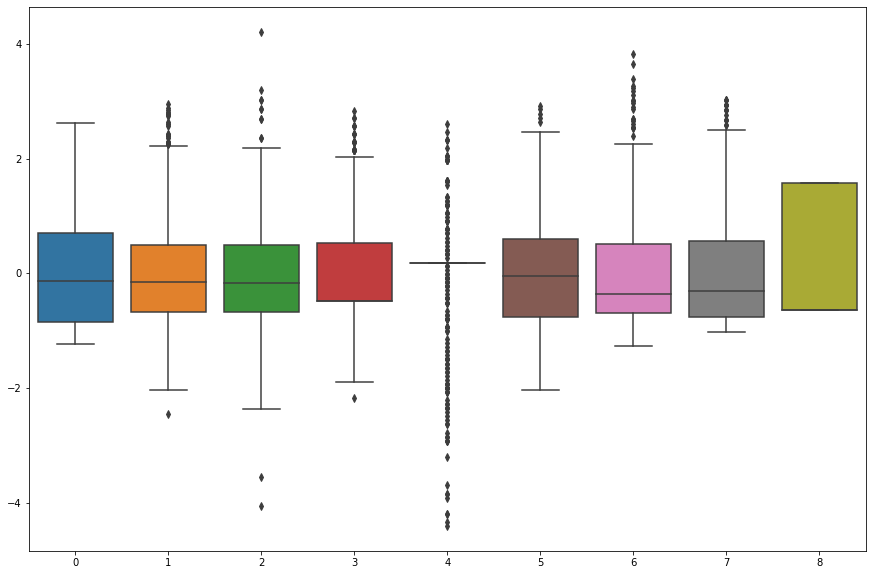

In [45]:
fig=plt.subplots(figsize=(15,10))
sns.boxplot(data=df_new_scalar)

In [46]:
x_scaled

array([[ 0.70025902,  1.17490758, -0.00459712, ...,  0.39066983,
         0.78757553,  1.53493025],
       [-1.22692647, -1.0249557 , -0.51141404, ..., -0.71439537,
        -0.24654474, -0.1360264 ],
       [ 1.47113322,  2.39705385, -0.68035302, ..., -1.23535468,
         0.9561821 , -0.04808131],
       ...,
       [ 0.31482192,  0.23210903, -0.00459712, ..., -0.77754196,
        -0.64370687, -0.22397148],
       [-1.22692647,  0.40670135, -1.01823097, ..., -0.16186277,
        -0.25403836,  1.27109499],
       [-1.22692647, -0.74560799, -0.1735361 , ..., -0.11450283,
        -0.38142999, -0.83958709]])

In [47]:
y

0      1
1      0
2      1
3      0
5      0
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 503, dtype: int64

In [48]:
def vif_score(x):
    scaler=StandardScaler()
    arr=scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])],columns=["Feature","VIF_score"])

In [49]:
vif_score(x)

,Feature,VIF_score
0,Pregnancies,1.370030
1,Glucose,1.225930
2,BloodPressure,1.261380
3,SkinThickness,1.310765
4,Insulin,1.081452
5,BMI,1.414910
6,DiabetesPedigreeFunction,1.016504
7,Age,1.533772


In [50]:
train_test_split(x_scaled,y,test_size=0.2,random_state=200)

[array([[-1.22692647, -0.46626027, -1.86292584, ..., -1.09327487,
          0.40914746, -0.57575183],
        [ 0.70025902, -1.0249557 ,  0.5022198 , ...,  0.01179033,
         -0.13039355,  0.83136956],
        [-1.22692647, -0.39642334,  0.67115877, ..., -1.85103387,
          0.27800902, -0.92753218],
        ...,
        [-0.13033785, -0.46626027, -0.84929199, ..., -1.45636772,
         -0.30274693, -0.66369692],
        [-0.84148937, -0.5360972 , -1.69398686, ..., -1.03012829,
          0.82504366, -1.01547726],
        [-0.84148937, -0.5360972 , -0.24909669, ..., -1.40900779,
         -1.15702019, -0.83958709]]),
 array([[-1.30337852e-01, -2.56749478e-01,  3.33280827e-01,
         -4.73251055e-01,  1.88178567e-01,  2.23770738e+00,
          1.00863748e+00, -7.51642004e-01],
        [ 3.14821922e-01, -1.02495570e+00,  1.64341852e-01,
         -2.74899987e-01,  1.88178567e-01, -3.35515874e-01,
          3.02442264e+00, -4.80813099e-02],
        [ 3.14821922e-01,  7.90804467e-01,  3

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=200)

In [52]:
x_train

array([[-1.22692647, -0.46626027, -1.86292584, ..., -1.09327487,
         0.40914746, -0.57575183],
       [ 0.70025902, -1.0249557 ,  0.5022198 , ...,  0.01179033,
        -0.13039355,  0.83136956],
       [-1.22692647, -0.39642334,  0.67115877, ..., -1.85103387,
         0.27800902, -0.92753218],
       ...,
       [-0.13033785, -0.46626027, -0.84929199, ..., -1.45636772,
        -0.30274693, -0.66369692],
       [-0.84148937, -0.5360972 , -1.69398686, ..., -1.03012829,
         0.82504366, -1.01547726],
       [-0.84148937, -0.5360972 , -0.24909669, ..., -1.40900779,
        -1.15702019, -0.83958709]])

In [53]:
x_test

array([[-1.30337852e-01, -2.56749478e-01,  3.33280827e-01,
        -4.73251055e-01,  1.88178567e-01,  2.23770738e+00,
         1.00863748e+00, -7.51642004e-01],
       [ 3.14821922e-01, -1.02495570e+00,  1.64341852e-01,
        -2.74899987e-01,  1.88178567e-01, -3.35515874e-01,
         3.02442264e+00, -4.80813099e-02],
       [ 3.14821922e-01,  7.90804467e-01,  3.03630441e+00,
        -4.73251055e-01,  1.88178567e-01,  2.79023998e+00,
        -7.11149497e-01,  3.91644124e-01],
       [ 3.14821922e-01, -1.17075619e-01, -4.59712169e-03,
         5.38268801e-01,  1.88178567e-01, -1.14063481e+00,
        -3.67232326e-02, -4.87806744e-01],
       [-8.41489374e-01, -9.55118775e-01, -1.18716994e+00,
        -1.08806878e+00, -1.78504296e+00,  2.48590019e-01,
        -9.39705064e-01, -6.63696918e-01],
       [ 3.14821922e-01, -2.91667943e-01,  8.40097749e-01,
         8.09325063e-01,  1.88178567e-01,  1.32208193e+00,
        -4.90087555e-01,  4.79589211e-01],
       [-1.22692647e+00, -1.170756

In [54]:
logr=LogisticRegression(verbose=1)

In [55]:
logr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [56]:
logr.predict(x_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
x_test[0]

array([-0.13033785, -0.25674948,  0.33328083, -0.47325105,  0.18817857,
        2.23770738,  1.00863748, -0.751642  ])

In [58]:
logr.predict([x_test[0]])

array([1], dtype=int64)

In [59]:
logr.predict_proba([x_test[0]])

array([[0.40136812, 0.59863188]])

In [60]:
y_test

531    0
218    1
84     1
205    0
331    0
      ..
446    0
41     0
265    0
508    0
564    0
Name: Outcome, Length: 101, dtype: int64

In [61]:
y_test.iloc[0]

0

In [62]:
logr.predict([x_test[1]])

array([0], dtype=int64)

In [63]:
logr.predict_proba([x_test[1]])

array([[0.78655987, 0.21344013]])

In [64]:
y_test.iloc[1]

1

In [65]:
logr.score(x_test,y_test)

0.8316831683168316

### using Solver = liblinear (L1+L2 Regularization)

In [66]:
logr_liblinear=LogisticRegression(verbose=1,solver="liblinear")

In [67]:
logr_liblinear.fit(x_train,y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [68]:
logr_liblinear.predict([x_train[0]])

array([0], dtype=int64)

In [69]:
logr_liblinear.predict_proba([x_train[0]])

array([[0.939434, 0.060566]])

In [70]:
y_test.iloc[0]

0

In [71]:
logr_liblinear.score(x_test,y_test)

0.8316831683168316

In [72]:
logr.score(x_test,y_test)

0.8316831683168316

In [73]:
y_pred_liblinear=logr_liblinear.predict(x_test)
y_pred_liblinear

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
y_pred=logr.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [75]:
# to draw confusion matrix
confusion_matrix(y_test,y_pred_liblinear)

array([[71,  6],
       [11, 13]], dtype=int64)

In [76]:
confusion_matrix(y_test,y_pred)

array([[71,  6],
       [11, 13]], dtype=int64)

In [83]:
def model_eval(y_test,y_pred):
    tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specific=tn/(fp+tn)
    result={"Accuracy":accuracy,"Precision":precision,"recall":recall,"specific":specific}
    return result

In [84]:
model_eval(y_test,y_pred)

{'Accuracy': 0.8316831683168316,
 'Precision': 0.6842105263157895,
 'recall': 0.5416666666666666,
 'specific': 0.922077922077922}

In [85]:
model_eval(y_test,y_pred_liblinear)

{'Accuracy': 0.8316831683168316,
 'Precision': 0.6842105263157895,
 'recall': 0.5416666666666666,
 'specific': 0.922077922077922}

In [80]:
y_test

531    0
218    1
84     1
205    0
331    0
      ..
446    0
41     0
265    0
508    0
564    0
Name: Outcome, Length: 101, dtype: int64

In [81]:
y_train

51     0
176    0
50     0
475    0
69     0
      ..
449    0
484    1
407    0
156    0
430    0
Name: Outcome, Length: 402, dtype: int64

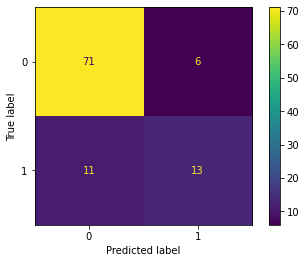

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = logr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

In [90]:
roc_auc_score(y_test,y_pred)

0.7318722943722943

In [91]:
roc_auc_score(y_test,y_pred_liblinear)

0.7318722943722943

In [92]:
roc_curve(y_test,y_pred)

(array([0.        , 0.07792208, 1.        ]),
 array([0.        , 0.54166667, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [93]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_liblinear)

In [94]:
fpr

array([0.        , 0.07792208, 1.        ])

In [95]:
tpr

array([0.        , 0.54166667, 1.        ])

In [96]:
thresholds

array([2, 1, 0], dtype=int64)